# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('../SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
groups1 = {
    # Maior que -10.5
    -13.49976: '> -10.5',
    -13.47656: '> -10.5',
    -13.19503: '> -10.5',
    -13.13056: '> -10.5',
    -12.99752: '> -10.5',
    -12.74137: '> -10.5',
    -12.55684: '> -10.5',
    -12.43601: '> -10.5',
    -12.17983: '> -10.5',
    -12.13178: '> -10.5',
    -12.06380: '> -10.5',
    -11.93554: '> -10.5',
    -11.91439: '> -10.5',
    -11.90842: '> -10.5',
    -11.82571: '> -10.5',
    -11.76712: '> -10.5',
    -11.72226: '> -10.5',
    -11.72133: '> -10.5',
    -11.70974: '> -10.5',
    -11.69949: '> -10.5',
    -11.67754: '> -10.5',
    -11.52855: '> -10.5',
    # Menor que -10.5
    -11.43387: '< -10.5',
    -11.42684: '< -10.5',
    -11.34413: '< -10.5',
    -11.19624: '< -10.5',
    -11.17321: '< -10.5',
    -11.12855: '< -10.5',
    -11.04561: '< -10.5',
    -10.93217: '< -10.5',
    -10.91553: '< -10.5',
    -10.88205: '< -10.5',
    -10.77388: '< -10.5',
    -10.72357: '< -10.5',
    -10.61207: '< -10.5',
    -10.56842: '< -10.5',
    -10.43595: '< -10.5',
    -10.43105: '< -10.5',
    -10.41177: '< -10.5',
    -10.33887: '< -10.5',
    -10.26310: '< -10.5',
    -10.24873: '< -10.5',
    -10.20981: '< -10.5',
     -9.90846: '< -10.5',
     -9.85139: '< -10.5',
     -9.71667: '< -10.5',
     -9.70554: '< -10.5',
     -9.42556: '< -10.5',
     -9.37819: '< -10.5',
     -9.19187: '< -10.5',
     -8.78502: '< -10.5',
     -8.76889: '< -10.5',
}

sinasc_1 = sinasc_raw[['munResLat', 'CONSULTAS', 'QTDPARTNOR', 'QTDPARTCES']].set_index('munResLat')
sinasc_1.groupby(groups1).agg({
    ('soma','sum'),
    ('media', 'mean'),
    'min', 
    'max',
    ('mediana', 'median'),
    ('DP', 'std'),
    ('variancia', 'var')
})

CONSULTAS                                                   \
                max   soma        DP min     media variancia mediana   
munResLat                                                              
< -10.5           9  71998  0.832886   1  3.528103  0.693700     4.0   
> -10.5           9  24664  0.607879   1  3.725680  0.369517     4.0   

          QTDPARTNOR                     ...                              \
                 max     soma        DP  ...     media variancia mediana   
munResLat                                ...                               
< -10.5         41.0  12142.0  1.256090  ...  0.653498  1.577761     0.0   
> -10.5         40.0   2429.0  1.037055  ...  0.369823  1.075483     0.0   

          QTDPARTCES                                                     
                 max    soma        DP  min     media variancia mediana  
munResLat                                                                
< -10.5         12.0  9143.0  0.741632  0.0  0.489611  0.550018     0.0  
> -10.5          4.0  3993.0  0.752706  0.0  0.608504  0.566567     0.0  

[2 rows x 21 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [4]:
groups2 = {
    # Maior que 3000
    3029.189: '> 3000',
    3135.106: '> 3000',
    3060.321: '> 3000',
    3442.005: '> 3000',
    3265.809: '> 3000',
    3792.998: '> 3000',
    3773.505: '> 3000',
    3958.273: '> 3000',
    3863.943: '> 3000',
    4426.571: '> 3000',
    4081.583: '> 3000',
    4987.177: '> 3000',
    4518.035: '> 3000',
    5126.723: '> 3000',
    5067.384: '> 3000',
    6240.932: '> 3000',
    6014.733: '> 3000',
    6896.648: '> 3000',
    6843.868: '> 3000',
    7460.219: '> 3000',
    7067.025: '> 3000',
    10071.643: '> 3000',
    8509.270: '> 3000',
    11518.915: '> 3000',
    10959.767: '> 3000',
    34096.394: '> 3000',
    24855.724: '> 3000',
    # Menor que 3000
    459.978: '< 3000',
    541.647: '< 3000',
    605.692: '< 3000',
    798.083: '< 3000',
    807.126: '< 3000',
    831.857: '< 3000',
    843.446: '< 3000',
    892.842: '< 3000',
    965.676: '< 3000',
    1191.875: '< 3000',
    1197.796: '< 3000',
    1314.352: '< 3000',
    1451.060: '< 3000',
    1457.888: '< 3000',
    1703.008: '< 3000',
    1717.640: '< 3000',
    1758.465: '< 3000',
    1931.378: '< 3000',
    1961.778: '< 3000',
    1969.850: '< 3000',
    2197.413: '< 3000',
    2548.683: '< 3000',
    2651.822: '< 3000',
    2783.300: '< 3000',
    2944.128: '< 3000',
}

sinasc_2 = sinasc_raw[['munResArea', 'CONSULTAS', 'QTDPARTNOR', 'QTDPARTCES']].set_index('munResArea')
sinasc_2.groupby(groups2).agg({
    ('soma','sum'),
    ('media', 'mean'),
    'min', 
    'max',
    ('mediana', 'median'),
    ('DP', 'std'),
    ('variancia', 'var')
})

CONSULTAS                                                   \
                 max   soma        DP min     media variancia mediana   
munResArea                                                              
< 3000             9  19520  0.607492   1  3.740180  0.369046     4.0   
> 3000             9  77142  0.820967   1  3.537326  0.673986     4.0   

           QTDPARTNOR                     ...                              \
                  max     soma        DP  ...     media variancia mediana   
munResArea                                ...                               
< 3000           10.0   1912.0  0.856441  ...  0.371334  0.733490     0.0   
> 3000           41.0  12659.0  1.278932  ...  0.632982  1.635668     0.0   

           QTDPARTCES                                                      
                  max     soma        DP  min     media variancia mediana  
munResArea                                                                 
< 3000            5.0   2952.0  0.749368  0.0  0.572981  0.561553     0.0  
> 3000           12.0  10184.0  0.744981  0.0  0.507070  0.554997     0.0  

[2 rows x 21 columns]

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
categories = pd.qcut(sinasc_raw['munResAlt'], 2)

sinasc_3 = sinasc_raw[['CONSULTAS', 'QTDPARTNOR', 'QTDPARTCES']]
sinasc_3.groupby(categories, observed=False).agg({
    ('soma','sum'),
    ('media', 'mean'),
    'min', 
    'max',
    ('mediana', 'median'),
    ('DP', 'std'),
    ('variancia', 'var')
})

CONSULTAS                                                   \
                      max   soma        DP min     media variancia mediana   
munResAlt                                                                    
(84.999, 153.0]         9  46579  0.910623   1  3.419395  0.829234     4.0   
(153.0, 595.0]          9  50083  0.599894   1  3.736143  0.359873     4.0   

                QTDPARTNOR                    ...                              \
                       max    soma        DP  ...     media variancia mediana   
munResAlt                                     ...                               
(84.999, 153.0]       40.0  9307.0  1.362645  ...  0.780527  1.856801     0.0   
(153.0, 595.0]        41.0  5264.0  1.018270  ...  0.398064  1.036874     0.0   

                QTDPARTCES                                                     
                       max    soma        DP  min     media variancia mediana  
munResAlt                                                                      
(84.999, 153.0]       12.0  5697.0  0.736925  0.0  0.475225  0.543058     0.0  
(153.0, 595.0]        12.0  7439.0  0.752433  0.0  0.561519  0.566156     0.0  

[2 rows x 21 columns]

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


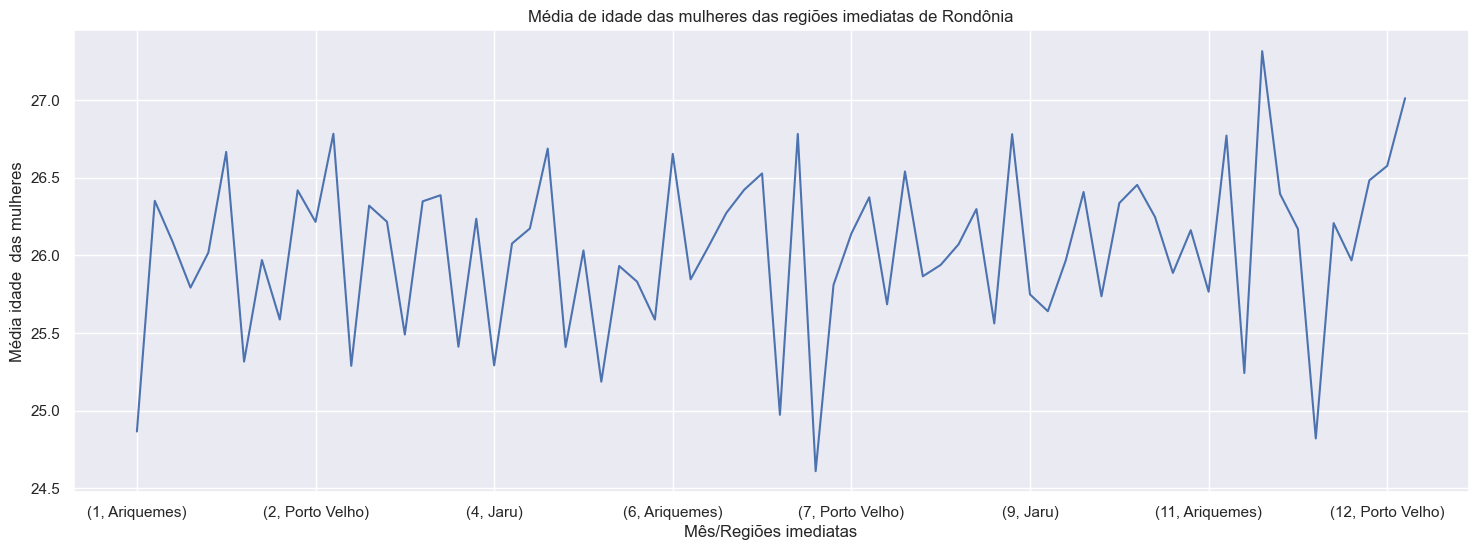

In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_4 = sinasc_raw[['munResNome', 'DTNASC','IDADEMAE']].set_index('munResNome')
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])
sinasc_4['meses'] = sinasc_4['DTNASC'].dt.month
calc_mean = sinasc_4.groupby(['meses', imediatas])['IDADEMAE'].mean()

calc_mean.plot(figsize=[18, 6])
plt.title('Média de idade das mulheres das regiões imediatas de Rondônia')
plt.ylabel('Média idade  das mulheres');
plt.xlabel('Mês/Regiões imediatas');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [7]:
idh = {
    # IDH-M Alto 
    "Porto Velho": "IDH-M Alto",
    "Vilhena": "IDH-M Alto",
    "Cacoal": "IDH-M Alto",
    "Ji-Paraná": "IDH-M Alto",
    "Pimenta Bueno": "IDH-M Alto",
    "Ariquemes": "IDH-M Alto",
    "Rolim de Moura": "IDH-M Alto",
    # IDH-M Médio
    "Cerejeiras": "IDH-M Médio",
    "Jaru": "IDH-M Médio",
    "Colorado do Oeste": "IDH-M Médio",
    "Ouro Preto do Oeste": "IDH-M Médio",
    "Espigão d'Oeste": "IDH-M Médio",
    "Santa Luzia d'Oeste": "IDH-M Médio",
    "Pimenteiras do Oeste": "IDH-M Médio",
    "Presidente Médici": "IDH-M Médio",
    "Castanheiras": "IDH-M Médio",
    "Guajará-Mirim": "IDH-M Médio",
    "Chupinguaia": "IDH-M Médio",
    "Cabixi": "IDH-M Médio",
    "Candeias do Jamari": "IDH-M Médio",
    "São Felipe d'Oeste": "IDH-M Médio",
    "Cacaulândia": "IDH-M Médio",
    "São Miguel do Guaporé": "IDH-M Médio",
    "Mirante da Serra": "IDH-M Médio",
    "Alvorada d'Oeste": "IDH-M Médio",
    "Teixeirópolis": "IDH-M Médio",
    "Nova Brasilândia d'Oeste": "IDH-M Médio",
    "Rio Crespo": "IDH-M Médio",
    "Primavera de Rondônia": "IDH-M Médio",
    "Alta Floresta D'Oeste": "IDH-M Médio",
    "Ministro Andreazza": "IDH-M Médio",
    "Novo Horizonte do Oeste": "IDH-M Médio",
    "Vale do Paraíso": "IDH-M Médio",
    "Alto Paraíso": "IDH-M Médio",
    "Parecis": "IDH-M Médio",
    "Buritis": "IDH-M Médio",
    "Itapuã do Oeste": "IDH-M Médio",
    "Corumbiara": "IDH-M Médio",
    "Cujubim": "IDH-M Médio",
    "Costa Marques": "IDH-M Médio",
    "São Francisco do Guaporé": "IDH-M Médio",
    "Urupá": "IDH-M Médio",
    "Monte Negro": "IDH-M Médio",
    # IDH-M Baixo
    "Seringueiras": "IDH-M Baixo",
    "Governador Jorge Teixeira": "IDH-M Baixo",
    "Machadinho d'Oeste": "IDH-M Baixo",
    "Campo Novo de Rondônia": "IDH-M Baixo",
    "Alto Alegre dos Parecis": "IDH-M Baixo",
    "Theobroma": "IDH-M Baixo",
    "Nova União": "IDH-M Baixo",
    "Nova Mamoré": "IDH-M Baixo",
    "Vale do Anari ": "IDH-M Baixo",
}

sinasc_5_1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']].set_index('munResNome').groupby(idh).agg({
    ('soma','sum'),
    ('media', 'mean'),
    'min', 
    'max',
    ('mediana', 'median'),
    ('DP', 'std'),
    ('variancia', 'var')
})

sinasc_5_1

IDADEMAE                                                      \
                 max    soma        DP min      media  variancia mediana   
munResNome                                                                 
IDH-M Alto        47  442955  6.415374  12  26.280332  41.157021    26.0   
IDH-M Baixo       46   31080  6.084248  13  25.206813  37.018070    25.0   
IDH-M Médio       53  188150  6.372269  11  25.855435  40.605816    25.0   

            IDADEPAI                                                          
                 max      soma        DP   min      media  variancia mediana  
munResNome                                                                    
IDH-M Alto      70.0  140082.0  7.773149  15.0  31.074091  60.421845    30.0  
IDH-M Baixo     53.0    9918.0  7.033657  16.0  30.237805  49.472328    29.0  
IDH-M Médio     73.0   63875.0  7.782052  16.0  31.265296  60.560338    30.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [8]:
ifdm = {
    # Desenvolvimento moderado
    "Ariquemes": "Desenvolvimento moderado",
    "Vilhena": "Desenvolvimento moderado",
    "Pimenta Bueno": "Desenvolvimento moderado",
    "Porto Velho": "Desenvolvimento moderado",
    "Ji-Paraná": "Desenvolvimento moderado",
    "Cacoal": "Desenvolvimento moderado",
    "Santa Luzia d'Oeste": "Desenvolvimento moderado",
    "Rolim de Moura": "Desenvolvimento moderado",
    "Chupinguaia": "Desenvolvimento moderado",
    "São Miguel do Guaporé": "Desenvolvimento moderado",
    "Pimenteiras do Oeste": "Desenvolvimento moderado",
    "Teixeirópolis": "Desenvolvimento moderado",
    "Colorado do Oeste": "Desenvolvimento moderado",
    "Jaru": "Desenvolvimento moderado",
    "Rio Crespo": "Desenvolvimento moderado",
    "Primavera de Rondônia": "Desenvolvimento moderado",
    "Alta Floresta d'Oeste": "Desenvolvimento moderado",
    "Ouro Preto do Oeste": "Desenvolvimento moderado",
    "São Francisco do Guaporé": "Desenvolvimento moderado",
    "Candeias do Jamari": "Desenvolvimento moderado",
    "Buritis": "Desenvolvimento moderado",
    "São Felipe d'Oeste": "Desenvolvimento moderado",
    "Presidente Médici": "Desenvolvimento moderado",
    "Cerejeiras": "Desenvolvimento moderado",
    "Monte Negro": "Desenvolvimento moderado",
    "Urupá": "Desenvolvimento moderado",
    # Desenvolvimento regular
    "Espigão d'Oeste": "Desenvolvimento regular",
    "Seringueiras": "Desenvolvimento regular",
    "Alvorada d'Oeste": "Desenvolvimento regular",
    "Itapuã do Oeste": "Desenvolvimento regular",
    "Cabixi": "Desenvolvimento regular",
    "Novo Horizonte do Oeste": "Desenvolvimento regular",
    "Nova Brasilândia d'Oeste": "Desenvolvimento regular",
    "Vale do Paraíso": "Desenvolvimento regular",
    "Corumbiara": "Desenvolvimento regular",
    "Alto Paraíso": "Desenvolvimento regular",
    "Cacaulândia": "Desenvolvimento regular",
    "Vale do Anari": "Desenvolvimento regular",
    "Ministro Andreazza": "Desenvolvimento regular",
    "Costa Marques": "Desenvolvimento regular",
    "Nova União": "Desenvolvimento regular",
    "Guajará-Mirim": "Desenvolvimento regular",
    "Mirante da Serra": "Desenvolvimento regular",
    "Parecis": "Desenvolvimento regular",
    "Castanheiras": "Desenvolvimento regular",
    "Theobroma": "Desenvolvimento regular",
    "Machadinho d'Oeste": "Desenvolvimento regular",
    "Campo Novo de Rondônia": "Desenvolvimento regular",
    "Nova Mamoré": "Desenvolvimento regular",
    "Cujubim": "Desenvolvimento regular",
    "Alto Alegre dos Parecis": "Desenvolvimento regular",
    "Governador Jorge Teixeira ": "Desenvolvimento regular",
}


sinasc_5_2 = sinasc_raw[['munResNome', 'CONSULTAS', 'QTDPARTNOR', 'QTDPARTCES']].set_index('munResNome').groupby(ifdm).agg({
    ('soma','sum'),
    ('media', 'mean'),
    'min', 
    'max',
    ('mediana', 'median'),
    ('DP', 'std'),
    ('variancia', 'var')
})

sinasc_5_2

CONSULTAS                                           \
                               max   soma        DP min     media variancia   
munResNome                                                                    
Desenvolvimento moderado         9  76542  0.803616   1  3.572389  0.645798   
Desenvolvimento regular          9  12604  0.769319   1  3.547425  0.591852   

                                 QTDPARTNOR                     ...            \
                         mediana        max     soma        DP  ...     media   
munResNome                                                      ...             
Desenvolvimento moderado     4.0       40.0  11010.0  1.128835  ...  0.558033   
Desenvolvimento regular      4.0       41.0   2513.0  1.510917  ...  0.740861   

                                           QTDPARTCES                          \
                         variancia mediana        max     soma        DP  min   
munResNome                                                                      
Desenvolvimento moderado  1.274269     0.0       12.0  10255.0  0.751994  0.0   
Desenvolvimento regular   2.282871     0.0        4.0   1690.0  0.721355  0.0   

                                                      
                             media variancia mediana  
munResNome                                            
Desenvolvimento moderado  0.517982  0.565495     0.0  
Desenvolvimento regular   0.495311  0.520353     0.0  

[2 rows x 21 columns]

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [9]:
pib = {
    # Acima de 1 Bilhão
    "Porto Velho ": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    # Acima de 500 Milhões
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste 	625 000 	Aumento": "Acima de 500 Milhões",
    "São Miguel do Guaporé 	616 000 	Aumento": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    # Acima de 300 Milhões
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    # Acima de 200 Milhões
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    # Acima de 100 Milhões
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Serngueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Govrnador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Sana Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    # Até 100 Milhões
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras": "Até 100 Milhões",
    "Teixeirópolis ": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões",
}

sinasc_5_3 = sinasc_raw[['munResNome', 'CONSULTAS', 'PESO', 'IDADEMAE', 'IDADEPAI']].set_index('munResNome').groupby(pib).agg({
    ('soma','sum'),
    ('media', 'mean'),
    'min', 
    'max',
})

sinasc_5_3

CONSULTAS                       PESO               \
                           max     media   soma min   max        media   
munResNome                                                               
Acima de 1 Bilhão            9  3.729756  34683   1  5720  3251.203893   
Acima de 100 Milhões         9  3.737444   5879   1  4810  3247.065480   
Acima de 200 Milhões         4  3.689788   1915   1  4680  3233.701349   
Acima de 300 Milhões         9  3.737220   4679   1  4888  3240.387380   
Acima de 500 Milhões         9  3.501500  10508   1  5135  3251.022992   
Até 100 Milhões              4  3.699634   1010   1  4505  3179.688645   

                                    IDADEMAE                        IDADEPAI  \
                          soma  min      max      media    soma min      max   
munResNome                                                                     
Acima de 1 Bilhão     30232945  292       47  26.222820  243846  12     70.0   
Acima de 100 Milhões   5107634  425       52  25.804196   40590  12     73.0   
Acima de 200 Milhões   1678291  930       41  25.146435   13051  13     55.0   
Acima de 300 Milhões   4056965  258       47  25.706070   32184  11     64.0   
Acima de 500 Milhões   9756320  285       53  25.769410   77334  13     60.0   
Até 100 Milhões         868055  320       41  26.846154    7329  16     61.0   

                                                 
                          media      soma   min  
munResNome                                       
Acima de 1 Bilhão     30.898190  122913.0  15.0  
Acima de 100 Milhões  31.866541   16953.0  17.0  
Acima de 200 Milhões  30.187500    5796.0  16.0  
Acima de 300 Milhões  30.819149    8691.0  16.0  
Acima de 500 Milhões  31.203767   18223.0  17.0  
Até 100 Milhões       31.543353    5457.0  17.0

- A média de consultas é maior em municípios com o PIB acima de 100 milhões
- A média de peso é maior em municípios com o PIB acima de 1 bilhão
- As mães são mais novas em municípios com o PIB acima de 200 milhões
- As pais são mais valhos em municípios com o PIB acima de 100 milhões